#### 0. Import basic methods (a.o. from source2.py)

In [1]:
from source2 import *
import numpy as np

In [2]:
# load basic info from the Input sheet
mapping = load_input_from_xls(filename=r'H2 Model - Input sheet (2 elements).xlsm')
Inputs = extract_scenario(mapping, 'Scenario1')

##### 1. prepare input data and generate objects
We are testing the following cases:
##### 1.1 Turbines

In [3]:
turbine_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Turbine')
turbine_data['depreciation_rate']=1/turbine_data['economic_lifetime']
display(turbine_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Turbine',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 1495000,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [4]:
Turbine = Object(**turbine_data)
# hier heb je alleen het object met inputs


*** calculate escalation values ****

Escalation years: [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052]
Escalation values: [1.02, 1.0404, 1.061208, 1.08243216, 1.1040808032, 1.126162419264, 1.14868566764928, 1.1716593810022657, 1.195092568622311, 1.2189944199947573, 1.2433743083946525, 1.2682417945625455, 1.2936066304537963, 1.3194787630628724, 1.3458683383241299, 1.3727857050906125, 1.4002414191924248, 1.4282462475762734, 1.4568111725277988, 1.485947395978355, 1.515666343897922, 1.5459796707758806, 1.5768992641913981, 1.6084372494752261, 1.6406059944647307, 1.6734181143540252, 1.7068864766411058, 1.741024206173928, 1.7758446902974065, 1.8113615841033548]

*** add Capex values + divestment ****

initial investment in 2023
CAPEX years: [2023, 2024, 2025]
CAPEX values: [-897000000.0, -1794000000.0, -1794000000.0]
CAPEX years escalated: [2023, 2024, 2025]
C

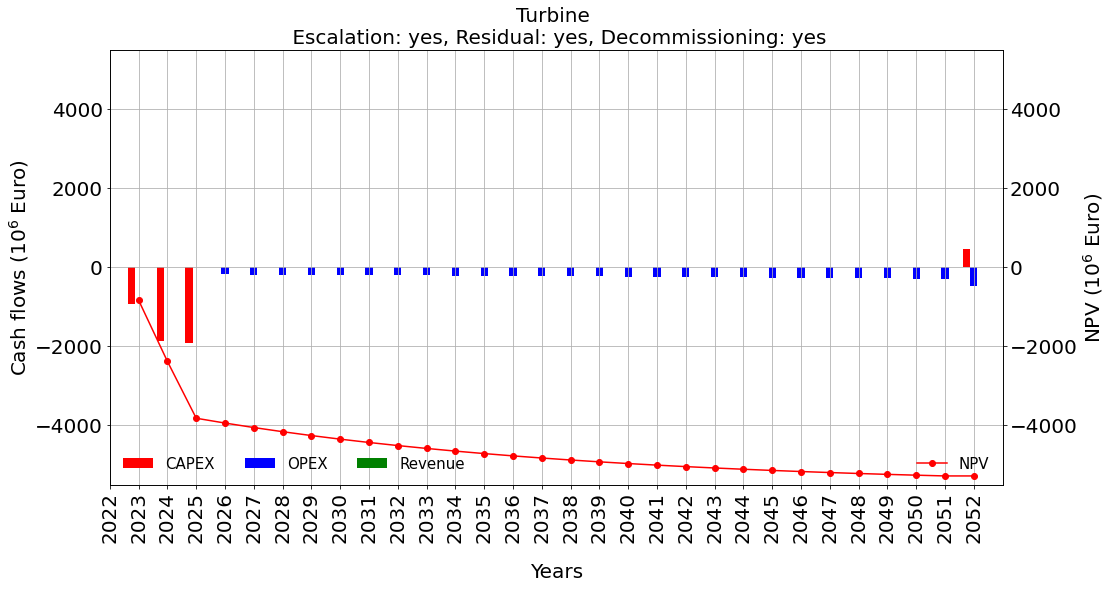

In [5]:
Turbine.generate_cashflows(startyear=2023, lifecycle=29, debug=True)
# na deze regel heeft Turbine.df (dataframe met alleen Capex, Opex en Residuals)
Turbine.df_npv = calculate_npv(Turbine.df, 2023, WACC=0.0984)
create_npv_plot(Turbine.df_npv, title='Turbine \n Escalation: yes, Residual: yes, Decommissioning: yes' )

##### 1.2 Foundations and cables

In [6]:
foundation_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation_data['depreciation_rate']=1/foundation_data['economic_lifetime']
display(foundation_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 934204,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.015,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [7]:
Foundation = Object(**foundation_data)
# hier heb je alleen het object met inputs


*** calculate escalation values ****

Escalation years: [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052]
Escalation values: [1.02, 1.0404, 1.061208, 1.08243216, 1.1040808032, 1.126162419264, 1.14868566764928, 1.1716593810022657, 1.195092568622311, 1.2189944199947573, 1.2433743083946525, 1.2682417945625455, 1.2936066304537963, 1.3194787630628724, 1.3458683383241299, 1.3727857050906125, 1.4002414191924248, 1.4282462475762734, 1.4568111725277988, 1.485947395978355, 1.515666343897922, 1.5459796707758806, 1.5768992641913981, 1.6084372494752261, 1.6406059944647307, 1.6734181143540252, 1.7068864766411058, 1.741024206173928, 1.7758446902974065, 1.8113615841033548]

*** add Capex values + divestment ****

initial investment in 2023
CAPEX years: [2023, 2024, 2025]
CAPEX values: [-560522400.0, -1121044800.0, -1121044800.0]
CAPEX years escalated: [2023, 2024, 2025]
C

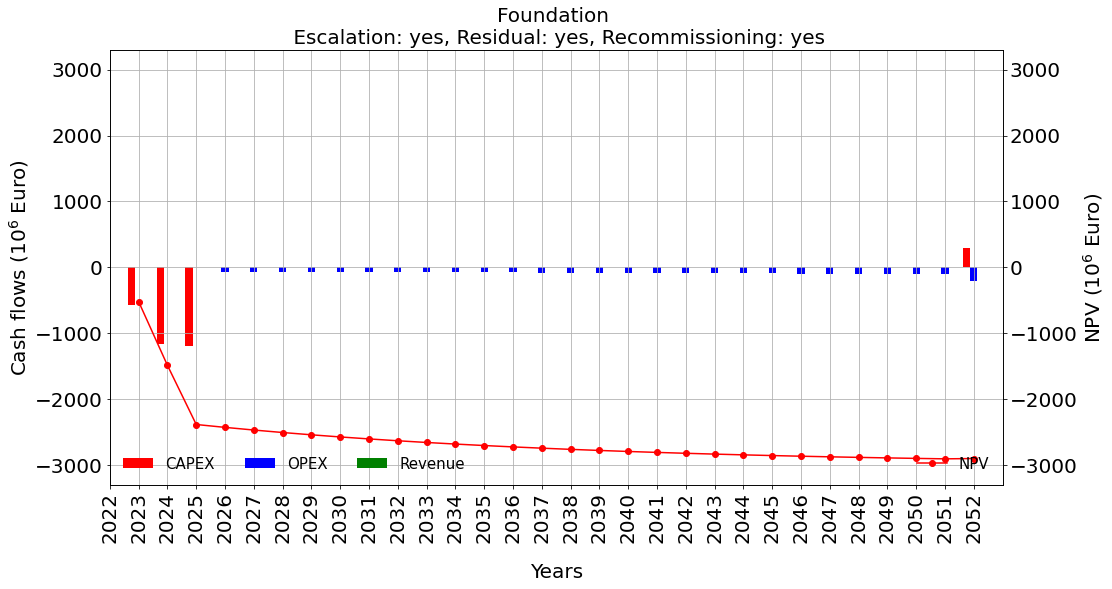

In [8]:
Foundation.generate_cashflows(startyear=2023, lifecycle=29, debug=True)
# na deze regel heeft Turbine.df (dataframe met alleen Capex, Opex en Residuals)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n Escalation: yes, Residual: yes, Recommissioning: yes' )

In [9]:
(Turbine.df+Foundation.df).tail()

,years,capex,opex,revenue,cashflow,cashflow_sum,npv,npv_sum
years,,,,,,,,
2048,4096,0.000000e+00,-3.723982e+08,0,-3.723982e+08,-1.456118e+10,-3.245144e+07,-8.097889e+09
2049,4098,0.000000e+00,-3.798462e+08,0,-3.798462e+08,-1.494102e+10,-3.013517e+07,-8.128024e+09
2050,4100,0.000000e+00,-3.874431e+08,0,-3.874431e+08,-1.532847e+10,-2.798422e+07,-8.156009e+09
2051,4102,0.000000e+00,-3.951920e+08,0,-3.951920e+08,-1.572366e+10,-2.598681e+07,-8.181995e+09
2052,4104,7.612954e+08,-6.788921e+08,0,8.240337e+07,-1.564126e+10,4.933206e+06,-8.177062e+09


#####  2. Test values - Turbines
##### 2.1 - CAPEX values

In [10]:
MTBS_values = {'years': [2023, 2024, 2025], 
               'values': [-914_940_000, -1_866_477_600, -1_903_807_151]}

In [11]:
for index, year in enumerate(MTBS_values['years']):
    
    print('CAPEX value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Turbine.df[Turbine.df.index==year].capex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Turbine.df[Turbine.df.index==year].capex.item(), 0)

CAPEX value testing in 2023: MTBS: -914940000 TUD/VO: -914940000.0
CAPEX value testing in 2024: MTBS: -1866477600 TUD/VO: -1866477600.0
CAPEX value testing in 2025: MTBS: -1903807151 TUD/VO: -1903807151.9999998


##### 2.2 - OPEX values

In [12]:
MTBS_values = {'years': [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052],
               'values': [-177_500_328, -181_050_335, -184_671_341, -188_364_768, -192_132_064, -195_974_705, -199_894_199, -203_892_083, -207_969_925, -212_129_323, -216_371_910, -220_699_348, -225_113_335, -229_615_601, -234_207_913, -238_892_072, -243_669_913, -248_543_311, -253_514_178, -258_584_461, -263_756_150, -269_031_273, -274_411_899, -279_900_137, -285_498_140, -291_208_102, -466_764_987]}

In [13]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Opex value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Turbine.df[Turbine.df.index==year].opex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Turbine.df[Turbine.df.index==year].opex.item(), 0)

Opex value testing in 2026: MTBS: -177500328 TUD/VO: -177500328.19374883
Opex value testing in 2027: MTBS: -181050335 TUD/VO: -181050334.75762382
Opex value testing in 2028: MTBS: -184671341 TUD/VO: -184671341.4527763
Opex value testing in 2029: MTBS: -188364768 TUD/VO: -188364768.28183183
Opex value testing in 2030: MTBS: -192132064 TUD/VO: -192132063.64746848
Opex value testing in 2031: MTBS: -195974705 TUD/VO: -195974704.92041785
Opex value testing in 2032: MTBS: -199894199 TUD/VO: -199894199.01882622
Opex value testing in 2033: MTBS: -203892083 TUD/VO: -203892082.99920273
Opex value testing in 2034: MTBS: -207969925 TUD/VO: -207969924.65918678
Opex value testing in 2035: MTBS: -212129323 TUD/VO: -212129323.1523705
Opex value testing in 2036: MTBS: -216371910 TUD/VO: -216371909.61541796
Opex value testing in 2037: MTBS: -220699348 TUD/VO: -220699347.80772632
Opex value testing in 2038: MTBS: -225113335 TUD/VO: -225113334.76388085
Opex value testing in 2039: MTBS: -229615601 TUD/VO: 

##### 2.3 - Decommissioning

In [14]:
MTBS_values = {'years': [2052],
               'values': [ -169732722,573259]} # decommissioning from MTBS

In [15]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Decommissioning value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Turbine.decommissioning_value))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Turbine.decommissioning_value, 0)

Decommissioning value testing in 2052: MTBS: -169732722 TUD/VO: -169732722.57325935


#####  3. Test values - Foundations and cables
##### 3.1 - CAPEX values

In [18]:
MTBS_values = {'years': [2023, 2024, 2025], 
               'values': [-571_732_848, -1_166_335_010, -1_189_661_710,]}

In [19]:
for index, year in enumerate(MTBS_values['years']):
    
    print('CAPEX value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Foundation.df[Foundation.df.index==year].capex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Foundation.df[Foundation.df.index==year].capex.item(), 0)

CAPEX value testing in 2023: MTBS: -571732848 TUD/VO: -571732848.0
CAPEX value testing in 2024: MTBS: -1166335010 TUD/VO: -1166335009.92
CAPEX value testing in 2025: MTBS: -1189661710 TUD/VO: -1189661710.1183999


##### 3.2 - OPEX values

In [20]:
MTBS_values = {'years': [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052],
               'values': [-63_381_373, -64_649_000, -65_941_980, -67_260_820, -68_606_036, -69_978_157, -71_377_720, -72_805_275, -74_261_380, -75_746_608, -77_261_540, -78_806_771, -80_382_906, -81_990_564, -83_630_375, -85_302_983, -87_009_043, -88_749_223, -90_524_208, -92_334_692, -94_181_386, -96_065_014, -97_986_314, -99_946_040, -101_944_961, -103_983_860, -212_127_075]}

In [21]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Opex value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Foundation.df[Foundation.df.index==year].opex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Foundation.df[Foundation.df.index==year].opex.item(), 0)

Opex value testing in 2026: MTBS: -63381373 TUD/VO: -63381372.80455344
Opex value testing in 2027: MTBS: -64649000 TUD/VO: -64649000.26064451
Opex value testing in 2028: MTBS: -65941980 TUD/VO: -65941980.265857406
Opex value testing in 2029: MTBS: -67260820 TUD/VO: -67260819.87117456
Opex value testing in 2030: MTBS: -68606036 TUD/VO: -68606036.26859805
Opex value testing in 2031: MTBS: -69978157 TUD/VO: -69978156.99397
Opex value testing in 2032: MTBS: -71377720 TUD/VO: -71377720.13384941
Opex value testing in 2033: MTBS: -72805275 TUD/VO: -72805274.5365264
Opex value testing in 2034: MTBS: -74261380 TUD/VO: -74261380.02725692
Opex value testing in 2035: MTBS: -75746608 TUD/VO: -75746607.62780206
Opex value testing in 2036: MTBS: -77261540 TUD/VO: -77261539.7803581
Opex value testing in 2037: MTBS: -78806771 TUD/VO: -78806770.57596527
Opex value testing in 2038: MTBS: -80382906 TUD/VO: -80382905.98748459
Opex value testing in 2039: MTBS: -81990564 TUD/VO: -81990564.10723428
Opex value

##### 3.3 - Decommissioning 


In [22]:
MTBS_values = {'years': [2052],
               'values': [-106063537.363765]} # decommissioning from MTBS, residual from python

In [23]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Residual value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Foundation.decommissioning_value))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Foundation.decommissioning_value, 0)

Residual value testing in 2052: MTBS: -106063537.363765 TUD/VO: -106063537.36376533


##### 3.4 - Divestment SUM (Foundation & Cables + Turbines)



In [25]:
MTBS_values = {'years': [2052],
               'values': [ 761_295_432]} # decommissioning from MTBS

wind_energy = [Foundation.divestment_value, Turbine.divestment_value]

for index, year in enumerate(MTBS_values['years']):
    
    print('Divestment value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], sum(wind_energy)))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  sum(wind_energy), 0)

Divestment value testing in 2052: MTBS: 761295432 TUD/VO: 761295432.00384
